# Eigenvalue & Eigenvector
Consider 

$$Av = \lambda v$$

$v$ is called "eigenvector", and $\lambda$ is called "eigenvalue" of matrix $A$. The eigenvector $v$ is scaled by eigenvalue $\lambda$
- Finding Eigenvalue

    Consider $Av = \lambda v$

    $$
    \begin{align}
    Av &= \lambda v\\
    Av - \lambda v &= 0\\
    (A - \lambda I) v &= 0\\
    \end{align}
    $$

    $A - \lambda I$ has nontrivial null space. So $det(A-\lambda I) = 0$. The previous equation is called "Characteristic equation".

    $$|A - \lambda I| = 0$$
    
    Consider Example matrix 2x2
    $$A = \begin{bmatrix}a & b\\ c & d\end{bmatrix}$$

    So
    $$\begin{align}
    \left |
    \begin{bmatrix}a & b\\ c & d\end{bmatrix} - 
    \lambda\begin{bmatrix}1 & 0\\ 0 & 1\end{bmatrix}\right | =&  0\\
    \left |
    \begin{bmatrix}a - \lambda& b\\ c & d - \lambda\end{bmatrix}\right | =&  0\\
    \lambda^2 - (a + d)\lambda + (ad - bc) =& 0\\
    \lambda^2 - tr(A)\lambda + det(A) =& 0\\
    \end{align}$$
    
- FInding Eigenvectors 

    Find all $v$ that $(A-\lambda I)v = 0$
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

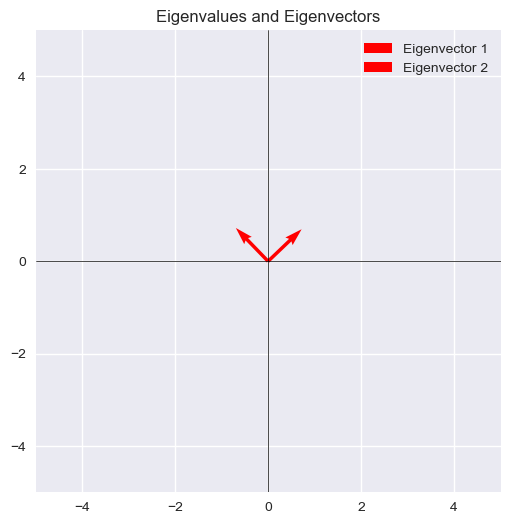

In [2]:
# Define a square matrix
A = np.random.rand(2, 2)

A = A.T @ A
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Plot the eigenvectors and eigenvalues
plt.figure(figsize=(6, 6))
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Plot eigenvectors
for i in range(len(eigenvectors)):
    plt.quiver(0, 0, eigenvectors[0, i], eigenvectors[1, i], angles='xy', scale_units='xy', scale=1, color='r',
               label=f'Eigenvector {i+1}')


plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.grid(True)
plt.legend()
plt.title('Eigenvalues and Eigenvectors')
plt.show()

# Generate The Fibonacci Sequence

Let $\{f_n\}$ be the fibonacci sequence; 
$$f_{n} = f_{n-1} + f_{n-2}$$

where $f_0 = 0,\  f_1 = 1$

In [3]:
def fibo(n):
    f1, f2 = 0, 1
    
    for _ in range(n):
        fn = f1 + f2
        f1, f2 = f2, fn
        
        yield fn

In [4]:
list(fibo(10))

[1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

Transform the fibonacci sequence function to first-order function.

$$\begin{align}
f_n &= f_{n-1} + s_{n-1}\\
s_n &= f_{n-1}
\end{align}$$

Let reconstruct this functions into a matrix transform

$$\begin{bmatrix}
f_n\\
s_n
\end{bmatrix}
=
\begin{bmatrix}
1 & 1\\
1 & 0
\end{bmatrix}
\begin{bmatrix}
f_{n-1}\\
s_{n-1}
\end{bmatrix}$$

In [5]:
fibo_transformer = np.array([[1, 1], 
                             [1, 0]])

init_vect = np.array([[0],
                      [1]])

In [19]:
new_vect = fibo_transformer @ init_vect

for _ in range(10):
    print(new_vect)
    print('-'*20)
    new_vect = fibo_transformer @ new_vect

[[1]
 [0]]
--------------------
[[1]
 [1]]
--------------------
[[2]
 [1]]
--------------------
[[3]
 [2]]
--------------------
[[5]
 [3]]
--------------------
[[8]
 [5]]
--------------------
[[13]
 [ 8]]
--------------------
[[21]
 [13]]
--------------------
[[34]
 [21]]
--------------------
[[55]
 [34]]
--------------------


# Finding Golden Ratio

Find the eigenvalue of fibonacci transformer matrix:

$$\begin{align}
\lambda^2 - (1 + 0)\lambda + (1 \times 0 - 1\times 1) &= 0\\
\lambda^2 - \lambda - 1 &= 0
\end{align}$$

From quadratic formula:
$$
x = \frac{{-b \pm \sqrt{{b^2 - 4ac}}}}{{2a}}
$$

where $a$, $b$, and $c$ are coefficients, and $x$ represents the variable.

Implies

$$\lambda = \frac{{-(-1) \pm \sqrt{{(-1)^2 - 4\times 1\times -1)}}}}{{2\times 1}} = \frac{{1 \pm \sqrt{{1 + 4}}}}{{2}} = \frac{{1 \pm \sqrt{{5}}}}{{2}}$$

That means $\lambda_1 \approx 1.618,\ \lambda_2 \approx -0.618$. 

Eigen value of fibonacci transformer matrix is the golden ratio.

In [7]:
# Find the eigenvalues and eigenvectors of the matrix

eigvals, eigvects = np.linalg.eig(fibo_transformer)

eigvals

array([ 1.61803399, -0.61803399])

In [8]:
eigvects

array([[ 0.85065081, -0.52573111],
       [ 0.52573111,  0.85065081]])

Consider the first eigenvalue and the first eigenvector

In [16]:
eigvals[0]

1.618033988749895

In [17]:
eigvects[:, 0]

array([0.85065081, 0.52573111])

In [9]:
f = lambda x: x * (eigvects[0, 0] / eigvects[1, 0])
x = np.linspace(0, 100, 100)

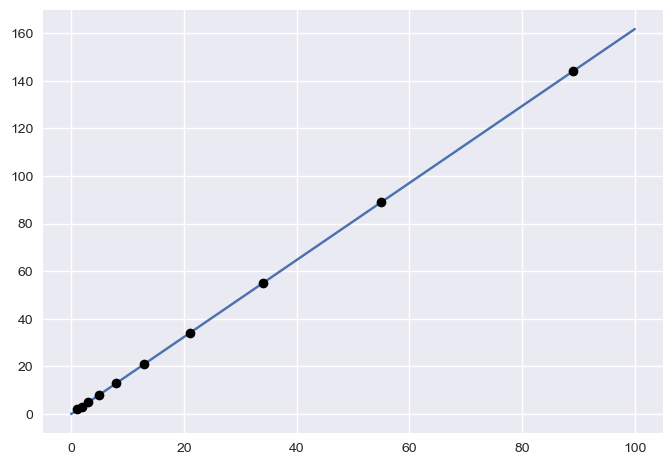

In [15]:
fibo_seq = list(fibo(11))
plt.plot(x, f(x))
plt.plot(fibo_seq[:-1], fibo_seq[1:] , 'o', color='black');